In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# Instead of load_boston, use fetch_california_housing:
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
house_price_dataset = fetch_california_housing()

# Create a pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

# Add the target variable to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target


In [3]:
# Checking for missing values
print(house_price_dataframe.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [4]:
# Splitting the data into features and target
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [7]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [8]:
model = XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.9}
Training R squared error :  0.9152992744825769
Training Mean Absolute Error :  0.233038730447824
Test R squared error :  0.8432613831261109
Test Mean Absolute Error :  0.3000650765679211


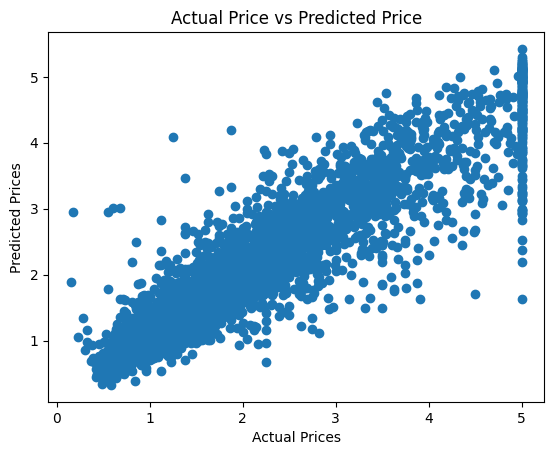

In [9]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluation on Training Data
training_data_prediction = best_model.predict(X_train)
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Training R squared error : ", score_1)
print('Training Mean Absolute Error : ', score_2)

# Evaluation on Test Data
test_data_prediction = best_model.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Test R squared error : ", score_1)
print('Test Mean Absolute Error : ', score_2)

# Visualizing the actual Prices and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()
